In [237]:
#import Dependencies
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [238]:
#load the reformated data with 46 new calculated values
#got the reformat data from the website and loaded in csv 
data_reformat = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/reformat_data.csv')
data_reformat

,unique_id,user_id,x0,x1,x2,x3,x4,x5,x6,x7,...,ypeak,zpeak,xabsoldev,yabsoldev,zabsoldev,xstandardev,ystandarddev,zstandarddev,resultant,class
0,1,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,...,293.94,1550.00,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging
1,2,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,...,269.44,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging
2,3,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,...,248.65,1780.00,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging
3,4,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,...,709.09,1380.00,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking
4,5,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,...,3300.00,1775.00,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,382,19,0.18,0.17,0.00,0.00,0.28,0.00,0.00,0.00,...,0.00,208.33,8.91,0.15,0.16,8.91,0.17,8.91,9.28,Sitting
5414,383,19,0.11,0.15,0.00,0.00,0.34,0.00,0.00,0.00,...,0.00,361.11,8.95,0.11,0.14,8.95,0.14,8.95,9.30,Sitting
5415,384,19,0.18,0.07,0.00,0.00,0.22,0.00,0.00,0.00,...,0.00,287.50,8.96,0.19,0.19,8.97,0.23,8.97,9.28,Sitting
5416,385,19,0.17,0.25,0.00,0.00,0.23,0.00,0.00,0.00,...,0.00,1233.33,8.95,0.17,0.33,8.96,0.30,8.96,9.28,Sitting


In [239]:
#Encode labels for activity class
from sklearn import preprocessing
# assign a  column name to the label vector
LABEL = 'Encodedactivity'
# use label encoder to convert string to an integer
encoded_activity = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data_reformat[LABEL] = encoded_activity.fit_transform(data_reformat['class'].values.ravel())
dummy=data_reformat.groupby(['class'])
dummy.head(10)
# data_reformat

,unique_id,user_id,x0,x1,x2,x3,x4,x5,x6,x7,...,zpeak,xabsoldev,yabsoldev,zabsoldev,xstandardev,ystandarddev,zstandarddev,resultant,class,Encodedactivity
0,1,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,...,1550.00,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging,1
1,2,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,...,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging,1
2,3,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,...,1780.00,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging,1
3,4,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,...,1380.00,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking,5
4,5,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,...,1775.00,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking,5
5,6,33,0.09,0.09,0.10,0.12,0.08,0.06,0.09,0.08,...,2675.00,2.00,3.39,1.94,3.13,4.95,3.13,8.63,Walking,5
6,7,33,0.12,0.12,0.12,0.13,0.15,0.11,0.08,0.09,...,1825.00,1.56,2.55,1.72,2.09,3.20,2.09,9.87,Upstairs,4
7,8,33,0.10,0.10,0.10,0.10,0.11,0.11,0.09,0.09,...,2983.33,1.84,2.69,1.41,2.22,3.35,2.22,9.91,Upstairs,4
8,9,33,0.08,0.07,0.08,0.08,0.05,0.08,0.14,0.10,...,1533.33,2.26,2.70,1.30,2.68,3.40,2.68,9.78,Upstairs,4
9,10,33,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,...,0.00,0.07,0.37,0.03,1.85,9.34,1.85,0.39,Upstairs,4


In [240]:
#check the type for each column
data_reformat.dtypes


unique_id            int64
user_id              int64
x0                 float64
x1                 float64
x2                 float64
x3                 float64
x4                 float64
x5                 float64
x6                 float64
x7                 float64
x8                 float64
x9                 float64
y0                 float64
y1                 float64
y2                 float64
y3                 float64
y4                 float64
y5                 float64
y6                 float64
y7                 float64
y8                 float64
y9                 float64
z0                 float64
z1                 float64
z2                 float64
z3                 float64
z4                 float64
z5                 float64
z6                 float64
z7                 float64
z8                 float64
z9                 float64
xavg                 int64
yavg               float64
zavg               float64
xpeak              float64
ypeak              float64
z

In [241]:
#import dependency and assign seed value
from numpy.random import seed
seed(1)

In [242]:
#import other dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [243]:
#create a list of y values
y =data_reformat["Encodedactivity"]
y.head(10)

0    1
1    1
2    1
3    5
4    5
5    5
6    4
7    4
8    4
9    4
Name: Encodedactivity, dtype: int32

In [244]:
#create a datframe of the required input columns 
x = data_reformat[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','y0','y1','y2','y3','y4','y5','y6','y7','y8','y9','z0','z1','z2','z3','z4','z5','z6','z7','z8','z9','xavg','yavg','zavg','xpeak','ypeak','zpeak','xabsoldev','yabsoldev','zabsoldev','xstandardev','ystandarddev','zstandarddev']]
#feature_names = x.columns
x.head()
x.dtypes

x0              float64
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
y0              float64
y1              float64
y2              float64
y3              float64
y4              float64
y5              float64
y6              float64
y7              float64
y8              float64
y9              float64
z0              float64
z1              float64
z2              float64
z3              float64
z4              float64
z5              float64
z6              float64
z7              float64
z8              float64
z9              float64
xavg              int64
yavg            float64
zavg            float64
xpeak           float64
ypeak           float64
zpeak           float64
xabsoldev       float64
yabsoldev       float64
zabsoldev       float64
xstandardev     float64
ystandarddev    float64
zstandarddev    

In [245]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=40)

In [246]:
#check the y_train values 
y_train

5034    1
154     5
58      5
540     1
3536    0
       ..
3603    1
4722    1
3340    4
3064    4
3398    5
Name: Encodedactivity, Length: 4063, dtype: int32

In [247]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [248]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [249]:
from tensorflow.keras.utils import to_categorical

In [250]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_test_categorical

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [113]:
# first, create a dense neural network with input layer of 30 input dimensions,then a dropout,then a hidden layer with 100 neurons,then a dropout and then a layer 6 outputs
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#59.78%
#82.66%, with noise - (0.05- 83.76%, 83.1%, 0.2 - 84.2%, 81.9%),with dropout (0.5)-85 to 87%, with dropout (0.1,0.1) - 85.2%, (0.2,0.1) - 86-87%
model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))




In [114]:
#check the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 60)                2580      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 606       
Total params: 9,286
Trainable params: 9,286
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [116]:
# Fit the model to the training data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
model.fit(X_train_scaled, y_train_categorical, epochs=300, class_weight=class_weights, verbose=2)



Epoch 1/300
 - 1s - loss: 1.1916 - accuracy: 0.5949
Epoch 2/300
 - 0s - loss: 0.7742 - accuracy: 0.7270
Epoch 3/300
 - 0s - loss: 0.6768 - accuracy: 0.7477
Epoch 4/300
 - 0s - loss: 0.6175 - accuracy: 0.7723
Epoch 5/300
 - 0s - loss: 0.5934 - accuracy: 0.7750
Epoch 6/300
 - 0s - loss: 0.5673 - accuracy: 0.7770
Epoch 7/300
 - 0s - loss: 0.5368 - accuracy: 0.7908
Epoch 8/300
 - 0s - loss: 0.5289 - accuracy: 0.7925
Epoch 9/300
 - 0s - loss: 0.4947 - accuracy: 0.8083
Epoch 10/300
 - 0s - loss: 0.4889 - accuracy: 0.8090
Epoch 11/300
 - 0s - loss: 0.4683 - accuracy: 0.8147
Epoch 12/300
 - 0s - loss: 0.4646 - accuracy: 0.8147
Epoch 13/300
 - 0s - loss: 0.4579 - accuracy: 0.8157
Epoch 14/300
 - 0s - loss: 0.4477 - accuracy: 0.8223
Epoch 15/300
 - 0s - loss: 0.4317 - accuracy: 0.8309
Epoch 16/300
 - 0s - loss: 0.4270 - accuracy: 0.8321
Epoch 17/300
 - 0s - loss: 0.4233 - accuracy: 0.8309
Epoch 18/300
 - 0s - loss: 0.4130 - accuracy: 0.8366
Epoch 19/300
 - 0s - loss: 0.4088 - accuracy: 0.8398
Ep

Epoch 155/300
 - 0s - loss: 0.1510 - accuracy: 0.9424
Epoch 156/300
 - 0s - loss: 0.1559 - accuracy: 0.9429
Epoch 157/300
 - 0s - loss: 0.1511 - accuracy: 0.9427
Epoch 158/300
 - 0s - loss: 0.1452 - accuracy: 0.9446
Epoch 159/300
 - 0s - loss: 0.1357 - accuracy: 0.9503
Epoch 160/300
 - 0s - loss: 0.1475 - accuracy: 0.9439
Epoch 161/300
 - 0s - loss: 0.1384 - accuracy: 0.9481
Epoch 162/300
 - 0s - loss: 0.1528 - accuracy: 0.9414
Epoch 163/300
 - 0s - loss: 0.1428 - accuracy: 0.9486
Epoch 164/300
 - 0s - loss: 0.1362 - accuracy: 0.9503
Epoch 165/300
 - 0s - loss: 0.1398 - accuracy: 0.9434
Epoch 166/300
 - 0s - loss: 0.1421 - accuracy: 0.9503
Epoch 167/300
 - 0s - loss: 0.1561 - accuracy: 0.9424
Epoch 168/300
 - 0s - loss: 0.1432 - accuracy: 0.9466
Epoch 169/300
 - 0s - loss: 0.1454 - accuracy: 0.9483
Epoch 170/300
 - 0s - loss: 0.1420 - accuracy: 0.9483
Epoch 171/300
 - 0s - loss: 0.1281 - accuracy: 0.9537
Epoch 172/300
 - 0s - loss: 0.1465 - accuracy: 0.9471
Epoch 173/300
 - 0s - loss: 

In [117]:
#calculate the model accuracy for test data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
#we get an accuracy of 86.19% using a dense neural network

Normal Neural Network - Loss: 0.5541680723538698, Accuracy: 0.8664206862449646


In [118]:
#Also check the performance of the trained datset
model_loss_training, model_accuracy_training = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss_training}, Accuracy: {model_accuracy_training}")

Normal Neural Network - Loss: 0.027934082710637326, Accuracy: 0.995323657989502


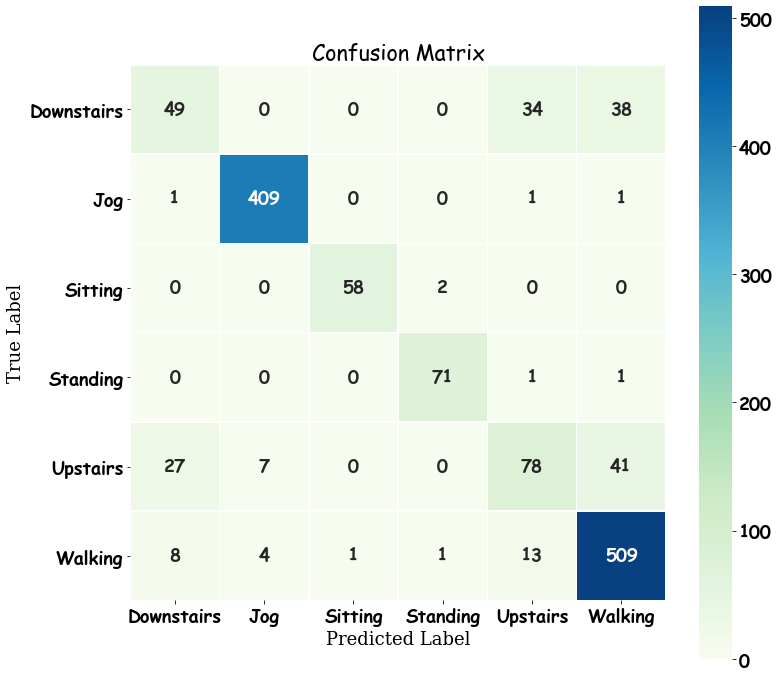

              precision    recall  f1-score   support

           0       0.58      0.40      0.48       121
           1       0.97      0.99      0.98       412
           2       0.98      0.97      0.97        60
           3       0.96      0.97      0.97        73
           4       0.61      0.51      0.56       153
           5       0.86      0.95      0.90       536

    accuracy                           0.87      1355
   macro avg       0.83      0.80      0.81      1355
weighted avg       0.85      0.87      0.86      1355



In [175]:
#create a confusion matrix for the model
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
font = {
    'family' : 'fantasy',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)




# width = 3
# height = 3
# plt.figure(figsize=(width, height))


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12,12))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='GnBu',
                linecolor='white',
                linewidths=0.5,
                xticklabels= ['Downstairs','Jog','Sitting','Standing','Upstairs','Walking'],
                yticklabels= ['Downstairs','Jog','Sitting','Standing','Upstairs','Walking'],
                annot=True,
                square=True,
                fmt='d'
                 )
    plt.title('Confusion Matrix')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.ylabel('True Label',fontname = "serif")
    plt.xlabel('Predicted Label',fontname = "serif")
    plt.show()
   
    

y_pred_test = model.predict(X_test_scaled)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_categorical, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))




In [251]:
#save the model

from sklearn.externals import joblib
filename = 'dnn_mainmodel.sav'
# joblib.dump(model, filename)
 



In [252]:
# load the model from disk
loaded_model = joblib.load(filename)
loaded_model.evaluate(
     X_test_scaled,y_test_categorical,verbose=2)

[0.5541680723538698, 0.8664206862449646]

In [253]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[120], axis=0)
result = np.expand_dims(y_test_categorical[120], axis=0)
test.shape
test
result

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [254]:
# Make a prediction.
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [1]


In [268]:
from keras.layers import Dense, Dropout , BatchNormalization

In [269]:
#Create a model using extra hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#adding more layers to the model
model = Sequential()

model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)




In [270]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 60)                2580      
_________________________________________________________________
dense_36 (Dense)             (None, 100)               6100      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_38 (Dense)             (None, 196)               12740     
_________________________________________________________________
dense_39 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                6304      
_________________________________________________________________
dense_41 (Dense)             (None, 6)                

In [271]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [272]:
#no weighted class
#fitting the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)



Train on 4063 samples
Epoch 1/100
4063/4063 - 2s - loss: 0.9193 - accuracy: 0.6862
Epoch 2/100
4063/4063 - 0s - loss: 0.5783 - accuracy: 0.7711
Epoch 3/100
4063/4063 - 0s - loss: 0.5070 - accuracy: 0.7977
Epoch 4/100
4063/4063 - 0s - loss: 0.4644 - accuracy: 0.8129
Epoch 5/100
4063/4063 - 0s - loss: 0.4396 - accuracy: 0.8255
Epoch 6/100
4063/4063 - 0s - loss: 0.3938 - accuracy: 0.8405
Epoch 7/100
4063/4063 - 0s - loss: 0.3594 - accuracy: 0.8602
Epoch 8/100
4063/4063 - 0s - loss: 0.3370 - accuracy: 0.8646
Epoch 9/100
4063/4063 - 0s - loss: 0.3079 - accuracy: 0.8752
Epoch 10/100
4063/4063 - 0s - loss: 0.2961 - accuracy: 0.8819
Epoch 11/100
4063/4063 - 0s - loss: 0.2772 - accuracy: 0.8952
Epoch 12/100
4063/4063 - 0s - loss: 0.2545 - accuracy: 0.8966
Epoch 13/100
4063/4063 - 0s - loss: 0.2294 - accuracy: 0.9079
Epoch 14/100
4063/4063 - 0s - loss: 0.2114 - accuracy: 0.9148
Epoch 15/100
4063/4063 - 0s - loss: 0.2009 - accuracy: 0.9232
Epoch 16/100
4063/4063 - 0s - loss: 0.1749 - accuracy: 0.

In [273]:
#calculate the model accuracy
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1355/1 - 0s - loss: 1.5140 - accuracy: 0.8140
Normal Neural Network - Loss: 1.0568141952212007, Accuracy: 0.8140221238136292


In [274]:
#Also check the performance of the trained datset
model_loss_training, model_accuracy_training = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss_training}, Accuracy: {model_accuracy_training}")

4063/1 - 0s - loss: 0.0123 - accuracy: 0.9911
Normal Neural Network - Loss: 0.023749930171256803, Accuracy: 0.9911395311355591


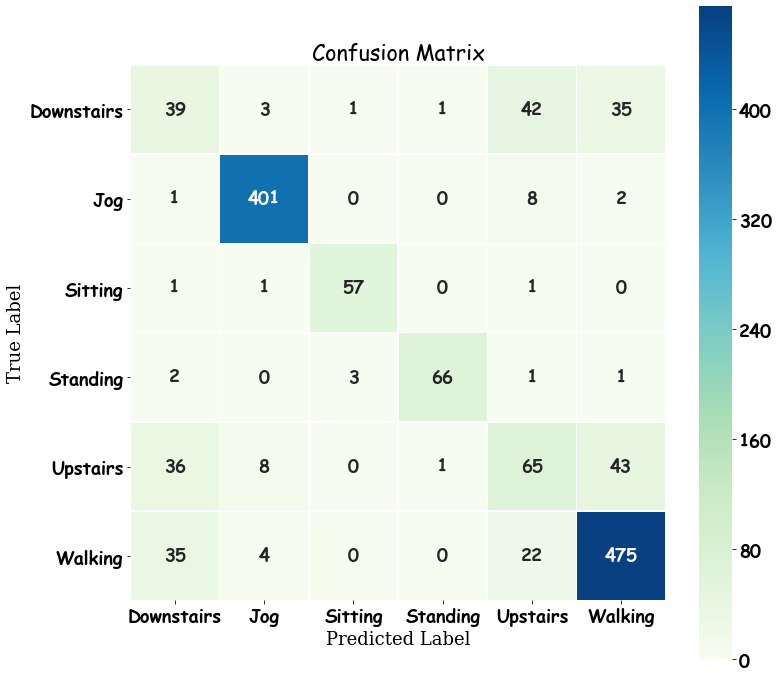

              precision    recall  f1-score   support

           0       0.34      0.32      0.33       121
           1       0.96      0.97      0.97       412
           2       0.93      0.95      0.94        60
           3       0.97      0.90      0.94        73
           4       0.47      0.42      0.45       153
           5       0.85      0.89      0.87       536

    accuracy                           0.81      1355
   macro avg       0.76      0.74      0.75      1355
weighted avg       0.81      0.81      0.81      1355



In [275]:
#create a confusion matrix for the model
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
font = {
    'family' : 'fantasy',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)




# width = 3
# height = 3
# plt.figure(figsize=(width, height))


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12,12))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='GnBu',
                linecolor='white',
                linewidths=0.5,
                xticklabels= ['Downstairs','Jog','Sitting','Standing','Upstairs','Walking'],
                yticklabels= ['Downstairs','Jog','Sitting','Standing','Upstairs','Walking'],
                annot=True,
                square=True,
                fmt='d'
                 )
    plt.title('Confusion Matrix')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.ylabel('True Label',fontname = "serif")
    plt.xlabel('Predicted Label',fontname = "serif")
    plt.show()
   
    

y_pred_test = model.predict(X_test_scaled)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_categorical, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))



In [282]:
 model.save("model.DNN_extralayer")

INFO:tensorflow:Assets written to: model.DNN_extralayer\assets
